In [1]:
bible = open("Pauline_Epistles.txt")
lines = []
for line in bible.readlines():
    line = line[line.find("\t")+1:-1]
    if len(line) > 150:
        lines.append(line[0:int(len(line)/2)])
        lines.append(line[int(len(line)/2):])
    else:
        lines.append(line)

In [2]:
!pip install transformers
!pip install transformers[torch]
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from transformers import (
    DistilBertConfig,
    DistilBertForMaskedLM,
    DistilBertTokenizer,
    DataCollatorForWholeWordMask,
    TrainingArguments,
    Trainer
)

from datasets import Dataset
import torch

In [4]:
model_name = "distilbert-base-uncased"
model = DistilBertForMaskedLM.from_pretrained(model_name)

150


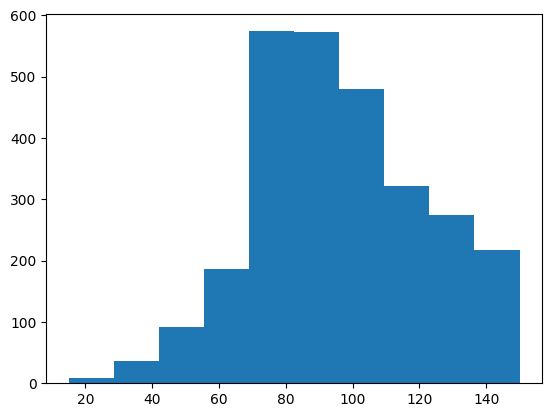

In [5]:
print(max([len(line) for line in lines]))
import numpy as np
import matplotlib.pyplot as plt
n, bins, patches = plt.hist([len(line) for line in lines])
plt.show()

In [6]:
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
inputs = tokenizer(lines,max_length=250,truncation=True,padding='max_length',return_tensors='pt')

In [7]:
inputs["labels"] = inputs["input_ids"].detach().clone()
ds = Dataset.from_dict(inputs)
split_dataset = ds.train_test_split(test_size=0.1)

In [8]:
data_collator = DataCollatorForWholeWordMask(tokenizer=tokenizer, mlm_probability=0.15)

In [9]:
training_args = TrainingArguments("test_trainer",
                                  evaluation_strategy="epoch",
                                  save_strategy="epoch",
                                  num_train_epochs=3)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=split_dataset["train"],
    eval_dataset=split_dataset["test"]
)

In [10]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:951: UserWarning: DataCollatorForWholeWordMask is only suitable for BertTokenizer-like tokenizers. Please refer to the documentation for more information.
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,2.947954
2,3.011000,2.568874
3,3.011000,2.656441


/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:951: UserWarning: DataCollatorForWholeWordMask is only suitable for BertTokenizer-like tokenizers. Please refer to the documentation for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/data/data_collator.py:951: UserWarning: DataCollatorForWholeWordMask is only suitable for BertTokenizer-like tokenizers. Please refer to the documentation for more information.
  warnings.warn(


TrainOutput(global_step=933, training_loss=2.8341042210945875, metrics={'train_runtime': 288.1973, 'train_samples_per_second': 25.868, 'train_steps_per_second': 3.237, 'total_flos': 482540731785000.0, 'train_loss': 2.8341042210945875, 'epoch': 3.0})

In [12]:
model.distilbert.save_pretrained("pauline_epistles");